<a href="https://colab.research.google.com/github/Guilherme-Loss/Repositorio_Guilherme/blob/main/Aula_Solve_ivp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from dataclasses import dataclass



In [96]:
@dataclass
class ParametrosAquecimento:
  T0: float = 25.0 #Temperatura inicial
  Q: float = 5000.0
  U: float = 150.0
  A: float = 5.0
  Tamb: float = 25.0
  m: float = 50.0
  Cp: float = 1670

def modelo_aquecimento(t,T,pars):
  Q, U, A, Tamb, m, Cp = pars.Q, pars.U, pars.A, pars.Tamb, pars.m, pars.Cp
  dTdt = (Q - U*A*(T-Tamb))/(m*Cp)
  return dTdt

def simula_aquecimento(tempo,par):
  T0 = par.T0
  teval = np.linspace(tempo[0],tempo[-1],100)
  sol = solve_ivp(modelo_aquecimento, tempo,[T0],t_eval=teval, args =(par,) , method='BDF')
  return sol.t, sol.y[0]





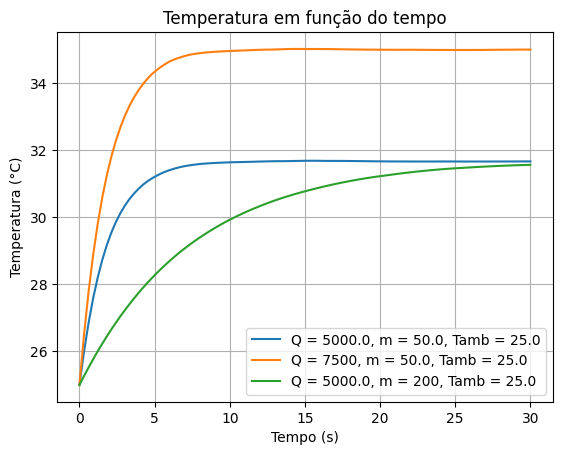

In [97]:
# params = ParametrosAquecimento() #Se quiser mudar o parâmetros é só colocar entre parenteses
Conjunto = [ParametrosAquecimento(),
            ParametrosAquecimento(Q=7500),
            ParametrosAquecimento(m = 200)]
tempo = [0, 30*60]

for params in Conjunto:
  Q, m, Tamb = params.Q, params.m, params.Tamb
  t, T = simula_aquecimento(tempo,params)
  plt.plot(t/60, T, label = f"Q = {Q}, m = {m}, Tamb = {Tamb}")

plt.title("Temperatura em função do tempo")
plt.xlabel('Tempo (s)')
plt.ylabel('Temperatura (°C)')
plt.grid()
plt.legend()
plt.show()

In [98]:
# Q, U, A, Tamb, m, Cp = params.Q, params.U, params.A, params.Tamb, params.m, params.Cp

# plt.plot(t/60, T, label = f"Q = {Q}, m = {m}, Tamb = {Tamb}")
# plt.title("Temperatura em função do tempo")
# plt.xlabel('Tempo (s)')
# plt.ylabel('Temperatura (°C)')
# plt.grid()
# plt.legend()
# plt.show()

In [105]:
dTdt = np.gradient(T,t)

# plt.plot(t/60, dTdt, label = f"Q = {Q}, m = {m}, Tamb = {Tamb}")
# plt.xlabel('Tempo (s)')
# plt.ylabel('dT/dt (°C/s)')
# plt.grid()
# plt.title("Variação da temperatura em função do tempo")
# plt.legend()
# plt.show()

import pandas as pd
resultado = pd.DataFrame({'t': t, 'T': T, 'dTdt': dTdt})
resultado.to_csv('resultado.csv', index=False)
